In [1]:
def load_questions(activation_f, question_f, max_size = -1):
    activations_file = "/Users/daniel/ideaProjects/allennlp/" + activation_f
    questions_file = "/Users/daniel/ideaProjects/allennlp/" + question_f
    features = []
    pred_ans = []
    with open(activations_file) as f:
        content = f.read().splitlines()
        for i, l in enumerate(content):
            # print(i)
            # print(l[0:100])

            if (max_size > -1 and len(pred_ans) > max_size):
                break

            if i % 2 == 0:
                # print(l)
                data = json.loads(l)
                features.append(data)
            else:
                pred_ans.append(l)

    questions = []
    labels = []
    with open(questions_file) as f:
        content = f.read().splitlines()
        for i, l in enumerate(content):
#             print(i)
#             print(l[0:100])
            if i % 3 == 0:
                questions.append({})
                questions[int(i / 3)]["q"] = l
            elif i % 3 == 1:
                questions[int(i / 3)]["p"] = l
            elif i % 3 == 2:
                ans = json.loads(l)
                questions[int(i / 3)]["a"] = [c['text'] for c in ans]
                labels.append(ans[0]['text'])

            if (max_size > -1 and len(labels) > max_size):
                break
    mat = numpy.array(features)

    return (mat, labels, questions, pred_ans)

In [31]:
from prereq import Prerequisit_Skills

preq = Prerequisit_Skills()
# print(preq.skills_map)
prerequisits = preq.read_prereq_file("mctest.json")

# ignore the nonsense content 
prerequisits = {x: prerequisits[x]  for x in prerequisits.keys() if 'Nonsense' not in prerequisits[x] }
# print(len(prerequisits))
# print(set(prerequisits.keys()))
# print(len(set(prerequisits.keys())))
prerequisits

{'mc160.dev.0-1': ['No skill'],
 'mc160.dev.0-2': ['Object Tracking', 'Elaboration', 'Coreference'],
 'mc160.dev.0-3': ['Schematic clauses'],
 'mc160.dev.0-4': ['Object Tracking'],
 'mc160.dev.1-1': ['Coreference'],
 'mc160.dev.1-2': ['Coreference', 'Schematic clauses'],
 'mc160.dev.1-3': ['Schematic clauses', 'Spatio-temporal'],
 'mc160.dev.1-4': ['Causality'],
 'mc160.dev.2-1': ['Coreference', 'Schematic clauses'],
 'mc160.dev.2-2': ['Schematic clauses', 'Punctuation', 'Causality'],
 'mc160.dev.2-3': ['No skill'],
 'mc160.dev.2-4': ['Coreference', 'Schematic clauses'],
 'mc160.dev.4-1': ['Bridging'],
 'mc160.dev.4-2': ['Bridging', 'Coreference'],
 'mc160.dev.4-3': ['Bridging'],
 'mc160.dev.4-4': ['Schematic clauses'],
 'mc160.dev.5-1': ['Coreference'],
 'mc160.dev.5-3': ['Coreference'],
 'mc160.dev.5-4': ['No skill'],
 'mc160.dev.6-1': ['Coreference'],
 'mc160.dev.6-2': ['Bridging'],
 'mc160.dev.6-3': ['Meta-knowledge', 'Schematic clauses', 'Coreference'],
 'mc160.dev.6-4': ['Bridgin

In [44]:
def normalize(list1): 
    return [ord(x) - ord('A') for x in list1]


correct_answer_map = {}
def read_answers(ff, prefix): 
    with open(ff) as file2:
        content = file2.read().splitlines()
        for line_iter, line in enumerate(content):
            for ans_iter, ans in enumerate(normalize(line.split("\t"))): 
                correct_answer_map[prefix + str(line_iter) + "-" + str(ans_iter + 1)] = ans

# read correct answers 
ansfile160 = "/Users/daniel/ideaProjects/allennlp/QA_datasets/mctest/ans/mc160.dev.ans.txt"
ansfile500 = "/Users/daniel/ideaProjects/allennlp/QA_datasets/mctest/ans/mc500.dev.ans.txt"

read_answers(ansfile160, "mc160.dev.")
read_answers(ansfile500, "mc500.dev.")
correct_answer_map

{'mc160.dev.0-1': 0,
 'mc160.dev.0-2': 2,
 'mc160.dev.0-3': 1,
 'mc160.dev.0-4': 1,
 'mc160.dev.1-1': 2,
 'mc160.dev.1-2': 3,
 'mc160.dev.1-3': 3,
 'mc160.dev.1-4': 0,
 'mc160.dev.2-1': 0,
 'mc160.dev.2-2': 2,
 'mc160.dev.2-3': 3,
 'mc160.dev.2-4': 3,
 'mc160.dev.3-1': 0,
 'mc160.dev.3-2': 1,
 'mc160.dev.3-3': 2,
 'mc160.dev.3-4': 1,
 'mc160.dev.4-1': 1,
 'mc160.dev.4-2': 1,
 'mc160.dev.4-3': 1,
 'mc160.dev.4-4': 2,
 'mc160.dev.5-1': 0,
 'mc160.dev.5-2': 2,
 'mc160.dev.5-3': 3,
 'mc160.dev.5-4': 1,
 'mc160.dev.6-1': 1,
 'mc160.dev.6-2': 1,
 'mc160.dev.6-3': 1,
 'mc160.dev.6-4': 3,
 'mc160.dev.7-1': 0,
 'mc160.dev.7-2': 3,
 'mc160.dev.7-3': 1,
 'mc160.dev.7-4': 1,
 'mc160.dev.8-1': 2,
 'mc160.dev.8-2': 2,
 'mc160.dev.8-3': 2,
 'mc160.dev.8-4': 2,
 'mc160.dev.9-1': 3,
 'mc160.dev.9-2': 1,
 'mc160.dev.9-3': 2,
 'mc160.dev.9-4': 3,
 'mc160.dev.10-1': 2,
 'mc160.dev.10-2': 0,
 'mc160.dev.10-3': 2,
 'mc160.dev.10-4': 3,
 'mc160.dev.11-1': 0,
 'mc160.dev.11-2': 3,
 'mc160.dev.11-3': 2,
 'mc16

In [53]:
import json
import numpy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

(mat, labels, questions, pred_ans) = load_questions("ipython/mctest/out33-ner-test.txt", "ipython/mctest/out22-ner-test.txt", max_size=-1)
# (mat_ad, labels_ad, questions_ad, pred_ans_ad) = load_questions("ipython/babi/out33-adv.txt", "ipython/babi/out22-adv.txt", max_size=-1)

# print(questions[0:10])

# read the questions and remember question ids:
question_paragraph_id_map = {}
ff = "/Users/daniel/ideaProjects/allennlp/QA_datasets/mctest.json"
with open(ff) as file:
    dataset_json = json.load(file)
    dataset = dataset_json['data']
    for article in dataset:
        for paragraph in article['paragraphs']:
            for qa in paragraph['qas']:
                if qa['id'] in prerequisits: 
                    key = qa['question'] + paragraph['context']
                    question_paragraph_id_map[key] = qa['id']

pred_ans

['Jessie Bear',
 'two best friends tocome',
 'a new jump rope and a fun game',
 'two',
 'her family',
 'tell them about her summer vacation',
 'she enjoyed nature',
 'camp',
 'a town outside the city',
 'so manycars',
 'in a town outside the city',
 'peaceful and quietand full of trees, flowers and animals.  One day his dad came in from work and said "Comeon, son, I\'m going to take you to the city." Todd was very exited so he put on his shoesand ran to the car.  When they got to the city Todd was very surprised there were so manycars',
 'pulled back to the curb',
 'started pulling away from the curb whenthey got to the corner',
 'ice cream truckhad',
 'told their mom about how close theycame',
 'Kelsey',
 'floor to floor',
 'much bigger than we had imagined',
 'spent our vacation playing',
 'Thismade',
 'to celebrate Ana winning',
 'spelling beewinner',
 "Everyone in Ana'sschool",
 'jump they wouldmake great friends',
 'lily pad',
 'spider',
 'wasGilbert',
 'green',
 'purple',
 'green

In [56]:
info_map = {}        
mat_new = []
labels_new = []
questions_new = []
pred_ans_new = []
multirc_reasoning_types = []
for i, x in enumerate(questions): 
#     print(qa)
    key = x['q'] + x['p']
    if key in question_paragraph_id_map: 
        mat_new.append(mat[i])
        labels_new.append(labels[i])
        questions_new.append(questions[i])
        pred_ans_new.append(pred_ans[i])
        idd = question_paragraph_id_map[key]
        ans_idx = correct_answer_map[idd]
        all_ans = x['a']
        ans = [1 if ans_idx == i else 0 for i in range(len(all_ans))]
#         print(ans_idx)
#         print(ans)
        multirc_reasoning_types.append(prerequisits[idd])
        info_map[x['q']] = (all_ans, ans, prerequisits[idd])
        
# len(questions_new)
# questions_new, info_map, 
pred_ans_new

['Jessie Bear',
 'two best friends tocome',
 'a new jump rope and a fun game',
 'two',
 'her family',
 'tell them about her summer vacation',
 'she enjoyed nature',
 'camp',
 'a town outside the city',
 'so manycars',
 'in a town outside the city',
 'peaceful and quietand full of trees, flowers and animals.  One day his dad came in from work and said "Comeon, son, I\'m going to take you to the city." Todd was very exited so he put on his shoesand ran to the car.  When they got to the city Todd was very surprised there were so manycars',
 'Kelsey',
 'floor to floor',
 'much bigger than we had imagined',
 'spent our vacation playing',
 'Thismade',
 'spelling beewinner',
 "Everyone in Ana'sschool",
 'jump they wouldmake great friends',
 'lily pad',
 'spider',
 'wasGilbert',
 'if she could hit a ball',
 'her Dad',
 'for not givingup',
 'very far',
 'theysuddenly',
 'in the water',
 'playing in the water',
 'almost an hour',
 'Mike and Jeff',
 'split their money they win',
 'split their mon

{'Causality', 'Logical Reasoning', 'Elaboration', 'Bridging', 'Ellipsis (implicit info)', 'Object Tracking', 'Mathematical Reasoning', 'Schematic clauses', 'Coreference', 'No skill', 'Spatio-temporal', 'Meta-knowledge', 'Punctuation'}
Causality -> 5.787037037037037 0
Logical Reasoning -> 20.04310344827586 0
Elaboration -> 6.73648247177659 0
Bridging -> 20.38910295486157 0
Ellipsis (implicit info) -> 17.045454545454547 0
Object Tracking -> 16.03174603174603 0
Mathematical Reasoning -> 12.5 0
Schematic clauses -> 24.660586187252523 0
Coreference -> 22.374651019374443 0
No skill -> 36.35161135161135 0
Spatio-temporal -> 28.122660081422968 0
Meta-knowledge -> 0.0 0
Punctuation -> 0.0 0


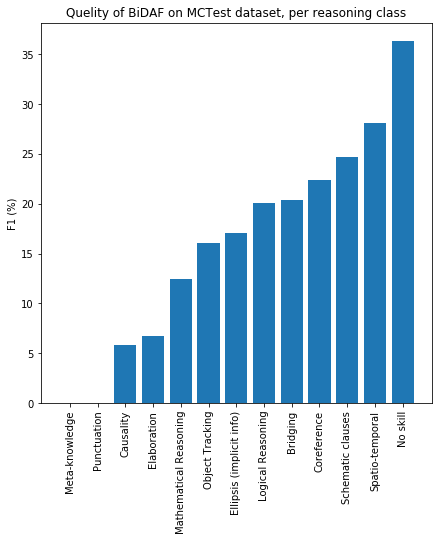

In [64]:
from evaluate11 import metric_max_over_ground_truths, f1_score, exact_match_score

# find the quality per reasoning type
scores = []
unique_types111 = set([y for x in multirc_reasoning_types for y in x])
print(unique_types111)

assert len(pred_ans_new) == len(questions_new)

scores_zipped_labels= []
for t in unique_types111:
#     print(t)
    scores_ins = []
    # select questions which contain the reasoning type 
    for i, x  in enumerate(questions_new): 
        question = x["q"]
        (ans_text, correct_or_not, phenomenon_labels) = info_map[question]
        assert sum(correct_or_not) > 0
#         print("correct_or_not: ", correct_or_not)
#         print("t: ", t)
        if t in phenomenon_labels: # check if the target phenomena is included 
            correct_ans = [a for (a, c) in zip(ans_text,correct_or_not) if c == 1]
#             print("i: ", i)
#             print("pred_ans_new: ", pred_ans_new[i])
            predicted_label = pred_ans_new[i]
#             print(correct_ans)
            max_f1 = max([f1_score(predicted_label,y) for y in correct_ans])
#             print(str(c) + " -> " + str(100.0 * max_f1))
            scores_ins.append(100.0 * max_f1)
    scores_zipped_labels.append((sum(scores_ins) / len(scores_ins), t))
    print(str(t) + " -> " + str(sum(scores_ins) / len(scores_ins)), len(scores))
# similarity = [f1_score(x,y) for x,y in zip(pred_ans, labels)]

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots(figsize=(7, 7))

# scores_zipped_labels = list(zip(scores,unique_types111))
scores_zipped_labels.sort(key=lambda x: x[0])
scores22, unique_types22 = zip(*scores_zipped_labels)

plt.bar(range(len(scores22)), scores22)
# ax.plot(range(len(scores)), scores, 'o')
ax.set_ylabel('F1 (%)')
ax.set_title('Quelity of BiDAF on MCTest dataset, per reasoning class')
# ax.set_yticks(range(len(q_labels)))
# ax.set_xticks(range(len(bibi_reasoning_types)))
ax.set_xticks(np.arange(len(unique_types22)))

# ax.set_yticklabels(q_labels)
ax.set_xticklabels(unique_types22, rotation=90)
plt.show()

In [65]:
# mat_concat = np.concatenate((mat, mat_ad), axis=0)
# reasoning_types = ["squad"]*len(pred_ans) + bibi_reasoning_types
unique_reasoning_types = list(unique_types111) # list(set(bibi_reasoning_types))
# # unique_reasoning_types_indices = list(range(len(unique_reasoning_types)))
multirc_reasoning_type_indices = [unique_reasoning_types.index(x) for coll in multirc_reasoning_types for x in coll]
# labels_concat = np.concatenate((labels, labels_ad))
# pred_concat = np.concatenate((pred_ans, pred_ans_ad))

# multirc_reasoning_type_indices
# unique_reasoning_types.index(x) 

In [67]:
from sklearn.cluster import KMeans
db = KMeans(n_clusters=len(unique_reasoning_types), random_state=2).fit(mat_new)
# db = DBSCAN(eps=0.3, min_samples=10).fit(mat_ad)
# core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# core_samples_mask[db.core_sample_indices_] = True

# labelsss = db.labels_
# repeat the labels, for each category 
labelsss = []
for i, l in enumerate(db.labels_): 
    for j in range(len(multirc_reasoning_types[i])): 
        labelsss.append(l)

len(unique_reasoning_types)

13

In [69]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import cluster, metrics

print(len(multirc_reasoning_type_indices))
print(len(labelsss))
matt1 = confusion_matrix(multirc_reasoning_type_indices, labelsss) 

/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


178
178


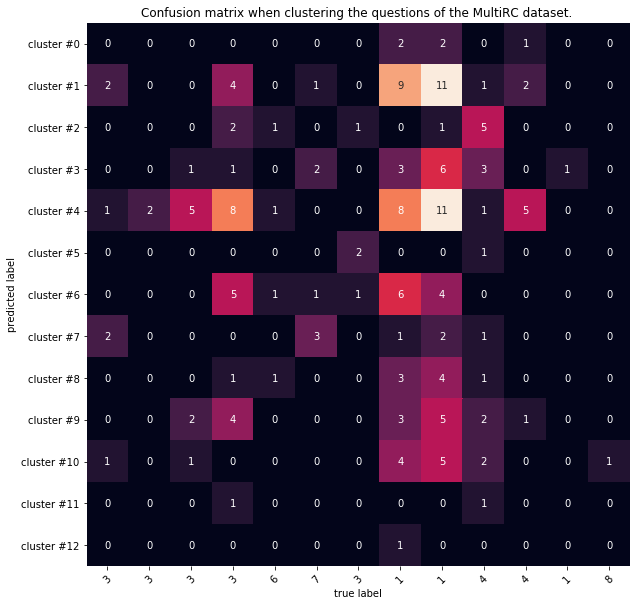

In [70]:
plt.figure(figsize=(10, 10))
sss = sns.heatmap(matt1.T, square=True,
            annot=True,
            fmt='d', cbar=False,
            xticklabels=True,
            yticklabels=True
            )

y_labels = ['cluster #' + str(i) for i in range(len(unique_reasoning_types))]
sss.set_xticklabels(labelsss, rotation=45)
sss.set_yticklabels(y_labels, rotation=0)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Confusion matrix when clustering the questions of the MultiRC dataset. ')
plt.show()

In [72]:
# clustering points into two groups
ss = len(unique_types111)
accuracy_table = np.zeros(shape=(ss, ss)) 


for ind1, type1 in enumerate(unique_types111): 
    for ind2, type2 in enumerate(unique_types111):
        
#         if ind1 > 3 or ind2 >3: 
#             continue 
        
        # we want different types 
        if type1 == type2 or ind2 <= ind1: 
            continue 
        print("type1: ", type1, " type2: ", type2)
        
        # loop through instances and select the points that have one of the two labels. 
        points = []
        labels = []
        for i, x in enumerate(multirc_reasoning_types): 
#             print(x)
            if type1 in x or type2 in x:
                points.append(mat_new[i])
                labels.append(x)
        
        from sklearn.cluster import KMeans
        db = KMeans(n_clusters=2, random_state=2).fit(points)
        cluster_labels = db.labels_
        
        # calculate the confusion matrix 
        same_label_same_cluster = 0
        same_label_diff_cluster = 0
        diff_label_same_cluster = 0
        diff_label_diff_cluster = 0
        
        def check_if_label_is_shared(labels1, labels2): 
            label_intersection = list(set(labels1) & set(labels2))
            return (type1 in label_intersection) or (type2 in label_intersection)
            
        for ii in range(len(cluster_labels)):
            for jj in range(len(cluster_labels)):
#                 print(labels[ii], labels[jj], labels[ii] == labels[jj])
                if ii == jj: 
                    continue 
                if cluster_labels[ii] == cluster_labels[jj] and check_if_label_is_shared(labels[ii], labels[jj]): 
                    same_label_same_cluster += 1
                if cluster_labels[ii] != cluster_labels[jj] and check_if_label_is_shared(labels[ii], labels[jj]): 
                    same_label_diff_cluster += 1
                if cluster_labels[ii] == cluster_labels[jj] and not check_if_label_is_shared(labels[ii], labels[jj]): 
                    diff_label_same_cluster += 1
                if cluster_labels[ii] == cluster_labels[jj] and not check_if_label_is_shared(labels[ii], labels[jj]): 
                    diff_label_diff_cluster += 1
        total_pairs = same_label_same_cluster + same_label_diff_cluster + diff_label_same_cluster + diff_label_diff_cluster
        print("same_label_same_cluster: ", same_label_same_cluster / total_pairs, same_label_same_cluster)
        print("same_label_diff_cluster: ", same_label_diff_cluster / total_pairs, same_label_diff_cluster)
        print("diff_label_same_cluster: ", diff_label_same_cluster / total_pairs, diff_label_same_cluster)
        print("diff_label_diff_cluster: ", diff_label_diff_cluster / total_pairs, diff_label_diff_cluster)
        print("---------")
        accuracy_table[ind1][ind2] = (diff_label_diff_cluster + same_label_same_cluster) / total_pairs
        accuracy_table[ind2][ind1] = accuracy_table[ind1][ind2] 
accuracy_table


type1:  Causality  type2:  Logical Reasoning
same_label_same_cluster:  0.4583333333333333 22
same_label_diff_cluster:  0.20833333333333334 10
diff_label_same_cluster:  0.16666666666666666 8
diff_label_diff_cluster:  0.16666666666666666 8
---------
type1:  Causality  type2:  Elaboration
same_label_same_cluster:  0.4 92
same_label_diff_cluster:  0.043478260869565216 10
diff_label_same_cluster:  0.2782608695652174 64
diff_label_diff_cluster:  0.2782608695652174 64
---------
type1:  Causality  type2:  Bridging
same_label_same_cluster:  0.354978354978355 328
same_label_diff_cluster:  0.38095238095238093 352
diff_label_same_cluster:  0.13203463203463203 122
diff_label_diff_cluster:  0.13203463203463203 122
---------
type1:  Causality  type2:  Ellipsis (implicit info)
same_label_same_cluster:  0.3157894736842105 36
same_label_diff_cluster:  0.05263157894736842 6
diff_label_same_cluster:  0.3157894736842105 36
diff_label_diff_cluster:  0.3157894736842105 36
---------
type1:  Causality  type2: 

same_label_same_cluster:  0.31613508442776733 674
same_label_diff_cluster:  0.13227016885553472 282
diff_label_same_cluster:  0.275797373358349 588
diff_label_diff_cluster:  0.275797373358349 588
---------
type1:  Bridging  type2:  Spatio-temporal
same_label_same_cluster:  0.49906542056074765 534
same_label_diff_cluster:  0.16448598130841122 176
diff_label_same_cluster:  0.16822429906542055 180
diff_label_diff_cluster:  0.16822429906542055 180
---------
type1:  Bridging  type2:  Meta-knowledge
same_label_same_cluster:  0.7734138972809668 512
same_label_diff_cluster:  0.2084592145015106 138
diff_label_same_cluster:  0.00906344410876133 6
diff_label_diff_cluster:  0.00906344410876133 6
---------
type1:  Bridging  type2:  Punctuation
same_label_same_cluster:  0.6900269541778976 512
same_label_diff_cluster:  0.18598382749326145 138
diff_label_same_cluster:  0.06199460916442048 46
diff_label_diff_cluster:  0.06199460916442048 46
---------
type1:  Ellipsis (implicit info)  type2:  Object Tra

same_label_same_cluster:  0.4576271186440678 162
same_label_diff_cluster:  0.4067796610169492 144
diff_label_same_cluster:  0.06779661016949153 24
diff_label_diff_cluster:  0.06779661016949153 24
---------
type1:  Spatio-temporal  type2:  Meta-knowledge
same_label_same_cluster:  0.7368421052631579 56
same_label_diff_cluster:  0.21052631578947367 16
diff_label_same_cluster:  0.02631578947368421 2
diff_label_diff_cluster:  0.02631578947368421 2
---------
type1:  Spatio-temporal  type2:  Punctuation
same_label_same_cluster:  0.5384615384615384 56
same_label_diff_cluster:  0.15384615384615385 16
diff_label_same_cluster:  0.15384615384615385 16
diff_label_diff_cluster:  0.15384615384615385 16
---------
type1:  Meta-knowledge  type2:  Punctuation


ZeroDivisionError: division by zero

In [64]:
# couts of the types  
values, counts = np.unique(bibi_reasoning_types, return_counts=True)

count_per_label = dict(zip(counts, values))

new_label_ordering = [count_per_label[c] for c in np.sum(matt, axis=1)]

values, counts,dict(zip(counts, values)), new_label_ordering

(array(['agents-motivations', 'basic-coreference', 'basic-deduction',
        'compound-coreference', 'conjunction', 'lists-sets',
        'simple-negation', 'single-supporting-fact', 'three-arg-relations',
        'three-supporting-facts', 'time-reasoning', 'two-arg-relations',
        'two-supporting-facts'], dtype='<U22'),
 array([130, 600, 186, 600, 600, 332, 289, 600, 604, 752, 424, 999, 388]),
 {130: 'agents-motivations',
  600: 'single-supporting-fact',
  186: 'basic-deduction',
  332: 'lists-sets',
  289: 'simple-negation',
  604: 'three-arg-relations',
  752: 'three-supporting-facts',
  424: 'time-reasoning',
  999: 'two-arg-relations',
  388: 'two-supporting-facts'},
 ['two-arg-relations',
  'time-reasoning',
  'two-supporting-facts',
  'three-supporting-facts',
  'basic-deduction',
  'lists-sets',
  'single-supporting-fact',
  'single-supporting-fact',
  'single-supporting-fact',
  'single-supporting-fact',
  'three-arg-relations',
  'agents-motivations',
  'simple-negation'

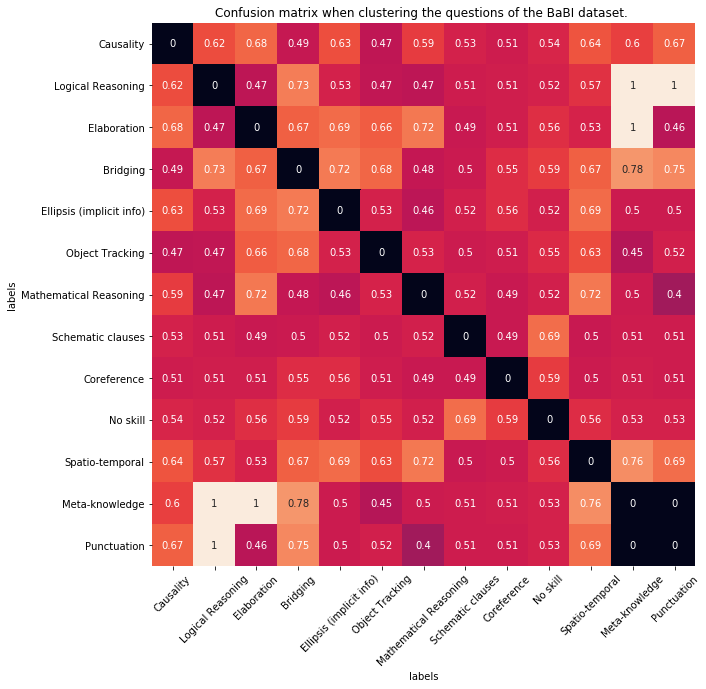

In [73]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import cluster, metrics

plt.figure(figsize=(10, 10))
sss = sns.heatmap(accuracy_table, square=True,
            annot=True,
            cbar=False,
            xticklabels=True,
            yticklabels=True
            )

sss.set_xticklabels(unique_types111, rotation=45)
sss.set_yticklabels(unique_types111, rotation=0)
plt.xlabel('labels')
plt.ylabel('labels')
plt.title('Confusion matrix when clustering the questions of the BaBI dataset. ')
plt.show()

[[0.         1.25       1.35652174 0.97402597 1.26315789 0.94117647
  1.18032787 1.05285412 1.01015965 1.07692308 1.28455285 1.2
  1.33333333]
 [1.25       0.         0.93023256 1.45846154 1.05263158 0.94736842
  0.93333333 1.01538462 1.02745098 1.04950495 1.13846154 1.84392015
  1.73333333]
 [1.35652174 0.93023256 0.         1.33457944 1.375      1.31428571
  1.43589744 0.98550725 1.02745098 1.12328767 1.05555556 2.
  0.91304348]
 [0.97402597 1.45846154 1.33457944 0.         1.44       1.35205993
  0.96296296 0.99384826 1.10967099 1.18386492 1.33457944 1.56495468
  1.50404313]
 [1.26315789 1.05263158 1.375      1.44       0.         1.05084746
  0.92857143 1.03195266 1.11309524 1.03703704 1.375      1.
  1.        ]
 [0.94117647 0.94736842 1.31428571 1.35205993 1.05084746 0.
  1.05882353 1.00663507 1.01624815 1.09803922 1.25581395 0.89655172
  1.03225806]
 [1.18032787 0.93333333 1.43589744 0.96296296 0.92857143 1.05882353
  0.         1.03651116 0.98989899 1.03703704 1.43589744 1.
  0

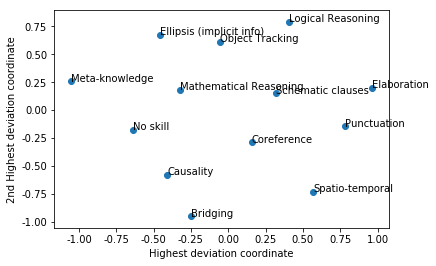

In [74]:
# Enforce triangle inequality
from scipy.sparse.csgraph import shortest_path

# dissimalrity = accuracy_table
#distanceMatrix = dissimalrity+0.5*np.eye(dissimalrity.shape[0], dissimalrity.shape[1])
distanceMatrix = accuracy_table # - np.ones(distanceMatrix.shape)
pathDistance=shortest_path(2*distanceMatrix)
print(pathDistance)

from sklearn.manifold import MDS
import matplotlib.pyplot as plt
mds=MDS(n_components=2,dissimilarity="precomputed", random_state=4)
emb=mds.fit_transform(pathDistance)
fig, ax = plt.subplots()
ax.scatter(emb[:,0],emb[:,1])
ax.set_xlabel("Highest deviation coordinate")
ax.set_ylabel("2nd Highest deviation coordinate")
for i, txt in enumerate(unique_types111):
    ax.annotate(txt, (emb[i,0],emb[i,1]))
plt.show()